In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pandas
import os
import seaborn as sns

import tissue.api as tissue

In [3]:
# user = "david.fischer"
# user = "ina"
user = "mayar.ali"

if user == "david.fischer":
    base_path_gcn = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/metabric/"
    base_path_mi = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/metabric/"
    base_path_reg = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/metabric/"
elif user == "ina":
    base_path_gcn = '../../results/GCN/basel_zurich/'
    base_path_reg = '../../results/REG/basel_zurich/'
    
elif user == "mayar.ali":
    base_path_gcn = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/metabric/"
    base_path_mi = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/metabric/"
    base_path_reg = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/metabric/"


# Overall

In [6]:
dir_figures="/lustre/groups/ml01/workspace/mayar.ali/tissue/figures/metabric/"

#### Multitasking settings

In [4]:
source_path={
    "2205100927_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    "2205131048_GCN_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    "2205030952_MI_NONE_GRADE_STANDARD_metabric_RADIUS": base_path_mi,
    "2205030953_REG_GRADE_STANDARD": base_path_reg,
    
    "2206130918_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1_TARGET": base_path_gcn,
    "2206120857_GCN_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1_TARGET": base_path_gcn,
    "2206121925_MI_NONE_GRADE_STANDARD_metabric_RADIUS_TARGET": base_path_mi,
    "2206121925_REG_GRADE_STANDARD_TARGET": base_path_reg,
}
gs_ids=[
    "2205100927_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1",
    "2205131048_GCN_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1",
    "2205030952_MI_NONE_GRADE_STANDARD_metabric_RADIUS",
    "2205030953_REG_GRADE_STANDARD",
    
    "2206130918_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1_TARGET",
    "2206120857_GCN_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1_TARGET",
    "2206121925_MI_NONE_GRADE_STANDARD_metabric_RADIUS_TARGET",
    "2206121925_REG_GRADE_STANDARD_TARGET",
    
]

In [5]:
container_mt = tissue.fits.GridSearchContainer(
    source_path=source_path,
    gs_ids=gs_ids
)
container_mt.load_gs()

loaded 2205100927_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1: 72 runs with 6-fold cross validation
loaded 2205131048_GCN_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1: 72 runs with 6-fold cross validation
loaded 2205030952_MI_NONE_GRADE_STANDARD_metabric_RADIUS: 162 runs with 6-fold cross validation
loaded 2205030953_REG_GRADE_STANDARD: 72 runs with 6-fold cross validation
loaded 2206130918_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1_TARGET: 24 runs with 6-fold cross validation
File 'gcn_none_metabric_gradeadam_lr3_dr1_drp1_l21_de2_wi2_lw1_lt1_bs2_md3_tk1_ck1_fsstandard_fe2_fpmean_mttarget_nc1_ew1_nh1_ssnone_cv4_evaluation.pickle' missing
File 'gcn_none_metabric_gradeadam_lr3_dr1_drp1_l21_de2_wi2_lw1_lt1_bs2_md3_tk1_ck1_fsstandard_fe2_fpmean_mttarget_nc1_ew1_nh1_ssnone_cv4_history.pickle' missing
File 'gcn_none_metabric_gradeadam_lr3_dr1_drp1_l21_de2_wi2_lw1_lt1_bs2_md3_tk1_ck1_fsstandard_fe2_fpmean_mttarget_nc1_ew1_nh1_ssnone_cv4_hyperparam.pickle' m

File '2206121925_reg_grade_standard_target_regression_metabric_grade_adam_lr3_l23_de3_wi1_lw4_bs2_fsstandard_mttarget_cv3_evaluation.pickle' missing
File '2206121925_reg_grade_standard_target_regression_metabric_grade_adam_lr3_l23_de3_wi1_lw4_bs2_fsstandard_mttarget_cv3_history.pickle' missing
File '2206121925_reg_grade_standard_target_regression_metabric_grade_adam_lr3_l23_de3_wi1_lw4_bs2_fsstandard_mttarget_cv3_hyperparam.pickle' missing
File '2206121925_reg_grade_standard_target_regression_metabric_grade_adam_lr3_l23_de3_wi1_lw4_bs2_fsstandard_mttarget_cv3_get_data_args.pickle' missing
File '2206121925_reg_grade_standard_target_regression_metabric_grade_adam_lr3_l23_de3_wi1_lw4_bs2_fsstandard_mttarget_cv3_model_args.pickle' missing
File '2206121925_reg_grade_standard_target_regression_metabric_grade_adam_lr3_l23_de3_wi1_lw4_bs2_fsstandard_mttarget_cv4_evaluation.pickle' missing
File '2206121925_reg_grade_standard_target_regression_metabric_grade_adam_lr3_l23_de3_wi1_lw4_bs2_fsstanda

In [6]:
container_mt.summary_table.index = np.arange(len(container_mt.summary_table))

In [7]:
test_acc = np.array([])
indices = container_mt.summary_table[container_mt.summary_table["test_grade_custom_categorical_acc"].isnull()].index
for row in np.arange(len(container_mt.summary_table)):
    if container_mt.summary_table.loc[row]["multitask_setting"] == "target":
        if row in indices:
            test_acc = np.append(test_acc, container_mt.summary_table.loc[row]["test_custom_categorical_acc"])
        else:
            test_acc = np.append(test_acc, container_mt.summary_table.loc[row]["test_grade_custom_categorical_acc"])
    else:
        test_acc = np.append(test_acc, container_mt.summary_table.loc[row]["test_grade_custom_categorical_acc"])
        
        
train_loss = np.array([])
indices = container_mt.summary_table[container_mt.summary_table["train_grade_loss"].isnull()].index
for row in np.arange(len(container_mt.summary_table)):
    if container_mt.summary_table.loc[row]["multitask_setting"] == "target":
        if row in indices:
        #if container.summary_table.loc[row]["test_grade_custom_categorical_acc"] == np.nan:
            train_loss = np.append(train_loss, container_mt.summary_table.loc[row]["train_loss"])
        else:
            train_loss = np.append(train_loss, container_mt.summary_table.loc[row]["train_grade_loss"])
    else:
        train_loss = np.append(train_loss, container_mt.summary_table.loc[row]["train_grade_loss"])

In [8]:
container_mt.summary_table["test_grade_custom_categorical_acc"] = test_acc
container_mt.summary_table["train_grade_loss"] = train_loss

In [9]:
sns.set_palette("gray_r")

selected ['model_class']
means=model_class
GCN      0.672159
GCNSS    0.685044
MI       0.679686
MLP      0.609614
Name: test_grade_custom_categorical_acc, dtype: float64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MI_small v.s. MI_target: t-test independent samples, P_val=7.910e-01 stat=-2.722e-01
MLP_small v.s. MLP_target: t-test independent samples, P_val=5.458e-01 stat=-6.252e-01
GCN_small v.s. GCN_target: t-test independent samples, P_val=2.344e-02 stat=-2.671e+00
GCNSS_small v.s. GCNSS_target: t-test independent samples, P_val=8.848e-01 stat=1.486e-01


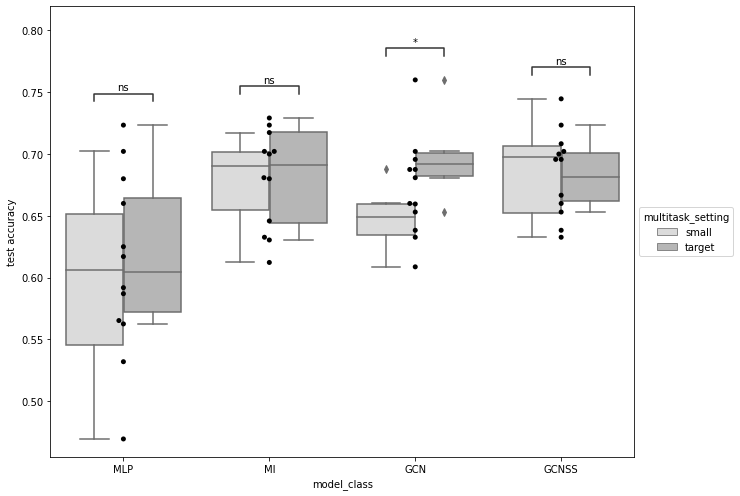

In [10]:
group_name="grade"
container_mt.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
#     metric_select=group_name + "_loss",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    param_hue="multitask_setting",  #  feature_space, depth_feature_embedding
    param_x=['model_class'],
#     save=dir_figures+"supp6_refactored_test_on_train_multitask", 
    suffix=".pdf",
    panel_width = 10,
    panel_height = 7,
    show_swarm=True,
    ttest = True,
    multitask=True,
)

### Grade


In [11]:
source_path={
    "2205100927_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    "2205122013_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    "2205131048_GCN_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    "2205030952_MI_NONE_GRADE_STANDARD_metabric_RADIUS": base_path_mi,
    "2205030953_REG_GRADE_STANDARD": base_path_reg,


}
gs_ids=[
    "2205100927_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1",
    "2205122013_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1",
    "2205131048_GCN_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1",
    "2205030952_MI_NONE_GRADE_STANDARD_metabric_RADIUS",
    "2205030953_REG_GRADE_STANDARD",
]

In [12]:
container = tissue.fits.GridSearchContainer(
    source_path=source_path,
    gs_ids=gs_ids
)
container.load_gs()

loaded 2205100927_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1: 72 runs with 6-fold cross validation
loaded 2205122013_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1: 72 runs with 6-fold cross validation
loaded 2205131048_GCN_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1: 72 runs with 6-fold cross validation
loaded 2205030952_MI_NONE_GRADE_STANDARD_metabric_RADIUS: 162 runs with 6-fold cross validation
loaded 2205030953_REG_GRADE_STANDARD: 72 runs with 6-fold cross validation


In [14]:
sns.set_palette("gray_r")

selected ['model_class']
means=model_class
GCN      0.647787
GCNSS    0.697019
MI       0.676408
MLP      0.595898
Name: test_grade_custom_categorical_acc, dtype: float64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MLP_molecular v.s. MI_molecular: t-test independent samples, P_val=6.281e-02 stat=-2.093e+00
MI_molecular v.s. GCN_molecular: t-test independent samples, P_val=1.776e-01 stat=1.450e+00
MI_molecular v.s. GCNSS_molecular: t-test independent samples, P_val=3.431e-01 stat=-9.951e-01


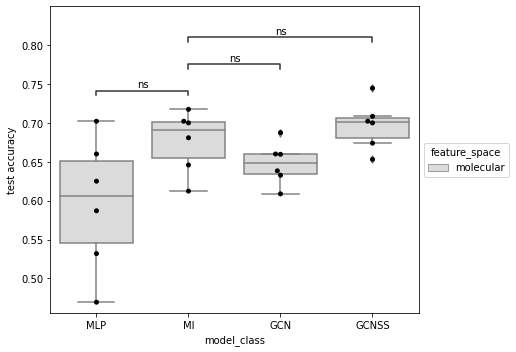

In [15]:
# t-test welch

### test chosen on train
group_name="grade"
container.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    param_hue="feature_space",  #  feature_space, depth_feature_embedding
    param_x=['model_class'],
#     save=dir_figures+"fig2a_refactored_test_on_train", 
    suffix=".pdf",
    panel_width = 7,
    panel_height = 5,
    ttest = True,
)

In [16]:
# train on validation
group_name="grade"
summary_table_on_val, param, ycol, order, ax = container.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show=group_name + "_custom_categorical_acc",
    partition_select="val",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    param_hue="feature_space",  #  feature_space, depth_feature_embedding
    param_x=['model_class'],
#     save=dir_figures+"fig2a_refactored", 
    suffix=".pdf",
    panel_width = 7,
    panel_height = 5,
#     ttest = True,
    return_summary_table=True
)


group_name="grade"
summary_table_on_train, param, ycol, order, ax = container.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    param_hue="feature_space",  #  feature_space, depth_feature_embedding
    param_x=['model_class'],
#     save=dir_figures+"fig2a_refactored", 
    suffix=".pdf",
    panel_width = 7,
    panel_height = 5,
#     ttest = True,
    return_summary_table=True
)

import pandas as pd
summary_table = pd.concat([summary_table_on_train, summary_table_on_val])

selected ['model_class']
selected ['model_class']


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MI_train v.s. MI_val: t-test independent samples, P_val=7.141e-02 stat=2.016e+00
MLP_train v.s. MLP_val: t-test independent samples, P_val=1.000e+00 stat=0.000e+00
GCN_train v.s. GCN_val: t-test independent samples, P_val=6.709e-01 stat=4.378e-01
GCNSS_train v.s. GCNSS_val: t-test independent samples, P_val=4.370e-03 stat=3.663e+00


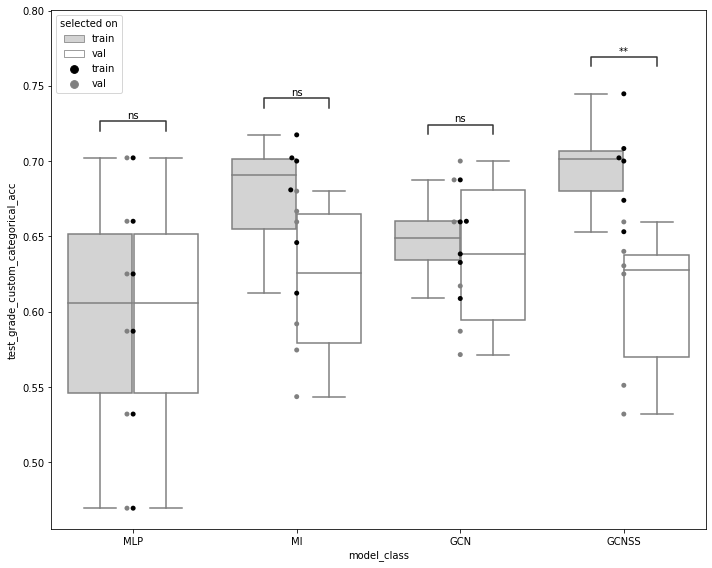

In [18]:
from statannot import add_stat_annotation
plt.ioff()
fig, ax = plt.subplots(
    nrows=1, ncols=1,
    figsize=(10, 8),
    sharey='col'
)
summary_table["selected on"] = summary_table["partition_select"]   
bp = sns.boxplot(
                x=param, hue="selected on", y=ycol,
                order=order,
                data=summary_table,
                ax=ax,
                palette=['lightgray', 'w']
    
                )
sns.swarmplot(
                x=param, hue="selected on", y=ycol, order=order,
                data=summary_table,
                ax=ax,
                palette=['black', 'gray']
            )
# plt.legend(title='selected on', loc='upper right', labels=['train', 'val'])
# add_stat_annotation(data=summary_table, x=param, y=ycol, hue="partition_select",
#                                                 ax=ax, 
#                                                 box_pairs=[(("MLP", "train"), ("GCN", "train")),
#                                                             (("MI", "train"), ("GCN", "train")),
#                                                             (("GCN", "train"), ("GCNSS", "train")),
#                                                             ],
#                                                 order=order,
#                                                 test='t-test_welch', text_format='star', loc='inside', verbose=2, comparisons_correction=None)

add_stat_annotation(data=summary_table, x=param, y=ycol, hue="partition_select",
                                                ax=ax, 
                                                box_pairs=[(("MLP", "train"), ("MLP", "val")),
                                                            (("MI", "train"), ("MI", "val")),
                                                            (("GCN", "train"), ("GCN", "val")),
                                                            (("GCNSS", "train"), ("GCNSS", "val")),
                                                            ],
                                                order=order,
                                                test='t-test_ind', text_format='star', loc='inside', verbose=2, comparisons_correction=None)
plt.tight_layout()
# plt.savefig(dir_figures + "fig2a_refactored_test_combined_ind" + ".pdf")
plt.show()

selected ['model_class']
means=model_class
GCN      0.647787
GCNSS    0.697019
MI       0.676408
MLP      0.595898
Name: test_grade_custom_categorical_acc, dtype: float64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MLP_molecular v.s. MI_molecular: t-test independent samples, P_val=6.281e-02 stat=-2.093e+00
MI_molecular v.s. GCN_molecular: t-test independent samples, P_val=1.776e-01 stat=1.450e+00
MI_molecular v.s. GCNSS_molecular: t-test independent samples, P_val=3.431e-01 stat=-9.951e-01


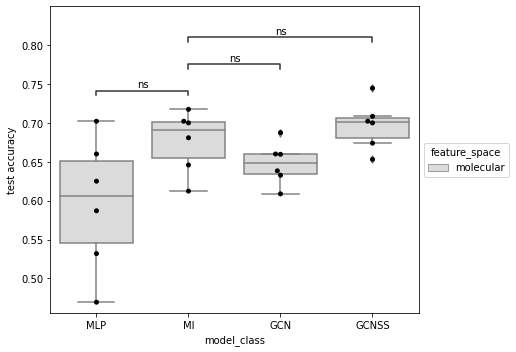

In [19]:
### test chosen on train
group_name="grade"
container.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    param_hue="feature_space",  #  feature_space, depth_feature_embedding
    param_x=['model_class'],
#     save=dir_figures+"fig2a_refactored_test_on_train", 
    suffix=".pdf",
    panel_width = 7,
    panel_height = 5,
    ttest = True,
)

#### Molecular analysis

In [20]:
container_std = tissue.fits.GridSearchContainer(
    source_path=source_path,
    gs_ids=gs_ids,
)
container_std.load_gs()


loaded 2205100927_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1: 72 runs with 6-fold cross validation
loaded 2205122013_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1: 72 runs with 6-fold cross validation
loaded 2205131048_GCN_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1: 72 runs with 6-fold cross validation
loaded 2205030952_MI_NONE_GRADE_STANDARD_metabric_RADIUS: 162 runs with 6-fold cross validation
loaded 2205030953_REG_GRADE_STANDARD: 72 runs with 6-fold cross validation


In [24]:
sns.set_palette('colorblind')

In [22]:
import sklearn.metrics

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MLP v.s. MI: t-test independent samples, P_val=9.985e-03 stat=-2.729e+00
MI v.s. GCN: t-test independent samples, P_val=8.022e-01 stat=-2.525e-01
MI v.s. GCNSS: t-test independent samples, P_val=3.429e-01 stat=-9.619e-01


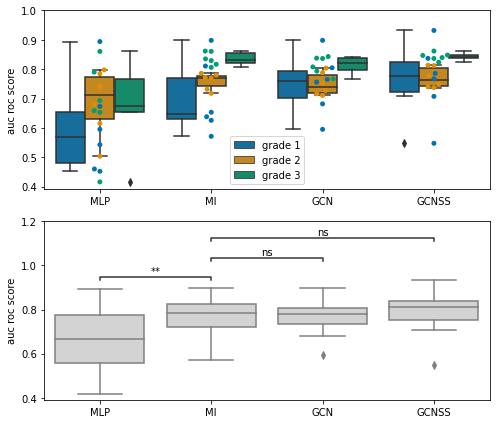

In [23]:
## test on train
group_name="grade"
container_std.plot_best_model_roc_auc(
    partition_show="test",
#     metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    suffix=".pdf",
    panel_width = 7,
    panel_height = 6,
    plot_all_groups=True,
    ttest=True,
#     save=dir_figures+"fig2b_refactored_test_on_train_auc_all_groups"
)

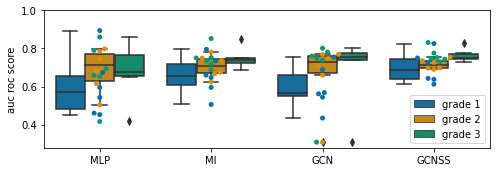

In [27]:
group_name="grade"
container_std.plot_best_model_roc_auc(
    partition_show="test",
#     metric_show=group_name + "_custom_categorical_acc",
    partition_select="val",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    suffix=".pdf",
    panel_width = 7,
    panel_height = 2.5,
#     save=dir_figures+"fig2b_refactored_test_on_val_0.5h"
)

#### GCN SS

In [28]:
container_gcnss = tissue.fits.GridSearchContainer(
    source_path={
        "2205122013_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    },
    gs_ids=[
        "2205122013_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1",
        
    ]
)
container_gcnss.load_gs()

loaded 2205122013_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1: 72 runs with 6-fold cross validation


In [29]:
gs_id, model_id, cv = container_gcnss.get_best_model_id(partition_select='train') ## CHANGED from VAL
container_gcnss.get_info(gs_id = gs_id, model_id=model_id)
print(model_id)
container_gcnss.runparams[gs_id][model_id]

gcnss_none_metabric_gradeadam_lr2_dr1_drp1_l21_de2_wi4_lw1_lt1_bs2_md2_tk1_ck1_fsstandard_fe2_fpmean_mtsmall_nc1_ew1_nh1_ssmultitask


{'model_id': 'gcnss_none_metabric_gradeadam_lr2_dr1_drp1_l21_de2_wi4_lw1_lt1_bs2_md2_tk1_ck1_fsstandard_fe2_fpmean_mtsmall_nc1_ew1_nh1_ssmultitask',
 'model_class': 'gcnss',
 'gs_id': '2205122013_gcnss_none_grade_standard_metabric_radius_transform_key_1',
 'data_set': 'metabric',
 'max_dist': 20,
 'target_label': 'grade',
 'graph_label_selection': ['ERstatus',
  'grade',
  'time_last_seen',
  'tumor_size'],
 'graph_covar_selection': None,
 'node_feature_space_id': 'standard',
 'node_feature_transformation': 'standardize_globally',
 'optimizer': 'adam',
 'learning_rate': 0.005,
 'depth_feature_embedding': 2,
 'depth': 2,
 'activation': 'leakyrelu_0.1',
 'dropout_rate': 0.0,
 'dropout_rate_pooling': 0.0,
 'l2_reg': 0.0,
 'loss_weight_others': 0.0,
 'loss_weight_type': 0.0,
 'batch_size': 32,
 'aggregation': 'none',
 'aggregation_depth': 1,
 'final_pooling': 'mean',
 'depth_final_dense': 1,
 'multitask_setting': 'small',
 'n_clusters': 5,
 'entropy_weight': 0.0001,
 'number_heads': 1,
 's

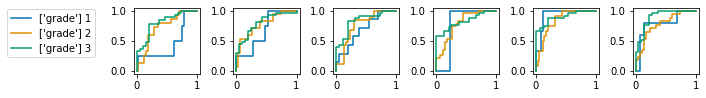

In [30]:
sns.set_palette("colorblind")
container_gcnss.plot_roc(partition='test')#, save=dir_figures+"supp_test_roc_on_train.pdf")

In [31]:
interpreter = tissue.fits.InterpreterGraph(results_path=base_path_gcn + gs_id + "/results/", cv=cv, model_id=model_id, model_class="GCNSS")
interpreter.load_model()

data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/metabric/"
buffered_data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/metabric/refacotered/buffer/"
interpreter.get_data_again(
    data_path=data_path,
)

2022-08-19 14:40:53.288083: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/storage/groups/ml01/workspace/mayar.ali/tissue/data/metabric/refactored/buffer//buffered_data_20_fine.pickle
Loading data from buffer
Loaded 500 images with complete data from 467 patients over 477856 cells with 39 cell features and 9 distinct celltypes.
Dropped 13 images with missing relevant target labels


/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l


Whole dataset: 487 images from 441 patients.
Test dataset: 49 images from 44 patients.
Training dataset: 394 images from 357 patients.
Validation dataset: 44 images from 40 patients.



In [32]:
preds = np.argmax(container_gcnss.info[interpreter.cv]['predictions']['train']['grade'], axis=1)
true = np.argmax(container_gcnss.true_labels[interpreter.cv]['train']['grade'], axis=1)
acc = preds == true

idx = interpreter.img_keys_train
degrees = [np.mean(interpreter.data.img_celldata[image_key].obsp['adjacency_matrix_connectivities'].sum(axis=1))
            for image_key in idx]

In [33]:
nodes_sorted = np.sort(degrees)
order = np.argsort(degrees)
acc_sorted = np.array(acc)[order]
true_sorted = np.array(true)[order]

In [34]:
sns.set_palette("colorblind")

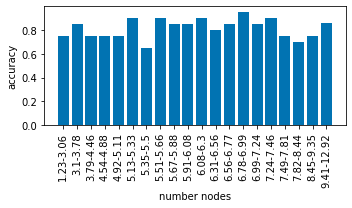

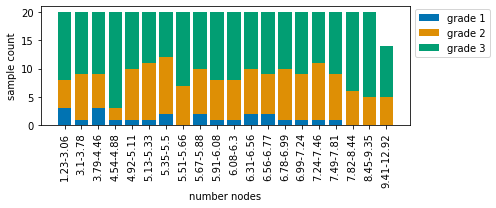

In [35]:
size = 20
accs = []
labels = []
plt.figure(figsize=(5,3))
a = []
b = []
c = []
for i in range(len(order)//size):
    accs.append(np.mean(acc_sorted[i*size:(i+1)*size]))
    labels.append(str(np.round(nodes_sorted[i*size], 2)) + '-' + str(np.round(nodes_sorted[(i+1)*size-1],2)))
    a.append(np.sum(true_sorted[i*size:(i+1)*size] == 0))
    b.append(np.sum(true_sorted[i*size:(i+1)*size] == 1))
    c.append(np.sum(true_sorted[i*size:(i+1)*size] == 2))
accs.append(np.mean(acc_sorted[len(order)//size*size:]))
labels.append(str(np.round(nodes_sorted[len(order)//size*size],2)) + '-' + str(np.round(nodes_sorted[-1], 2)))
a.append(np.sum(true_sorted[len(order)//size*size:] == 0))
b.append(np.sum(true_sorted[len(order)//size*size:] == 1))
c.append(np.sum(true_sorted[len(order)//size*size:] == 2))
plt.bar(height=accs, x=np.arange(len(accs)))
plt.xticks(np.arange(len(accs)), labels, rotation=90)
plt.xlabel('number nodes')
plt.ylabel('accuracy')
plt.tight_layout()
# plt.savefig(dir_figures + 'supp_acc_nr_nodes_train.pdf')
plt.show()
# if save is not None:
#     plt.tight_layout()
#     plt.savefig(save + '_acc_nr_nodes.pdf')
    
plt.figure(figsize=(7,3))
plt.bar(x=np.arange(len(accs)), height=a, label='grade 1')
plt.bar(x=np.arange(len(accs)), height=b, bottom=a, label='grade 2')
plt.bar(x=np.arange(len(accs)), height=c, bottom=np.array(a) + np.array(b), label='grade 3')
plt.legend(bbox_to_anchor=(1.0, 1.02))
plt.xlabel('number nodes')
plt.ylabel('sample count')
plt.xticks(np.arange(len(accs)), labels, rotation=90)
plt.tight_layout()
# plt.savefig(dir_figures + 'supp_nr_nodes_train.pdf')
plt.show()
# if save is not None:
#     plt.tight_layout()


In [36]:
gs_id, model_id, cv = container_gcnss.get_best_model_id(partition_select='train') ## CHANGED from VAL
container_gcnss.get_info(gs_id = gs_id, model_id=model_id)

2022-08-19 14:46:24.613682: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-19 14:46:24.664103: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2700000000 Hz
/home/iterm/mayar.ali/phd/projects/tissue/tissue/interpretation/interpreter.py:374: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  labels = list(np.array(labels)[[[l in label_names for l in labels]]])


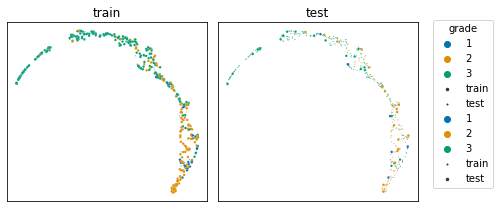

In [37]:
interpreter.plot_umap_graphs(
    label='grade',
    data_key='mb',
#     save=dir_figures+'fig3c_refactored'
)

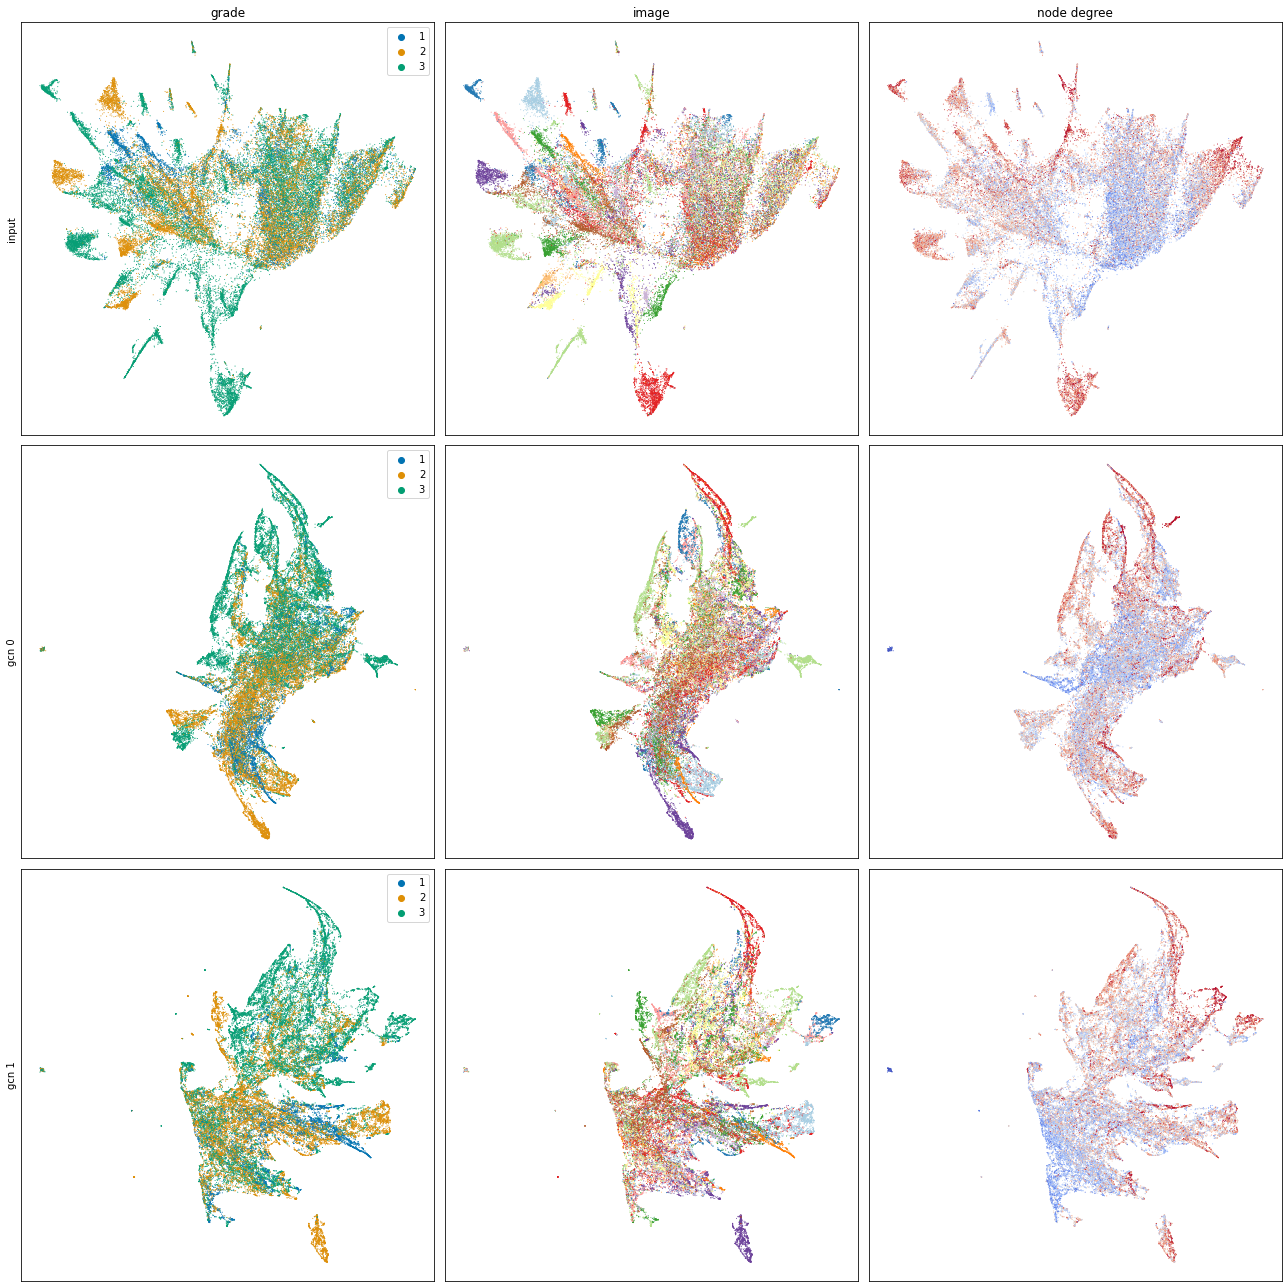

In [38]:
interpreter.plot_umap_nodes(
    interpreter.img_keys_test,
    plot_types = ['grade', 'images', 'degree'],
    layer_names=[
        'input',
        'Layer_gcn_0',
        'Layer_gcn_1',
    ],
    panel_width=6.0,
    panel_height=6.0,
    data_key='mb',
#     save=dir_figures+"supp_std_node_emb_refactored", 
    suffix=".pdf"
)

/home/iterm/mayar.ali/phd/projects/tissue/tissue/interpretation/interpreter.py:942: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['', 'grade 1', 'grade 2', 'grade 3'])


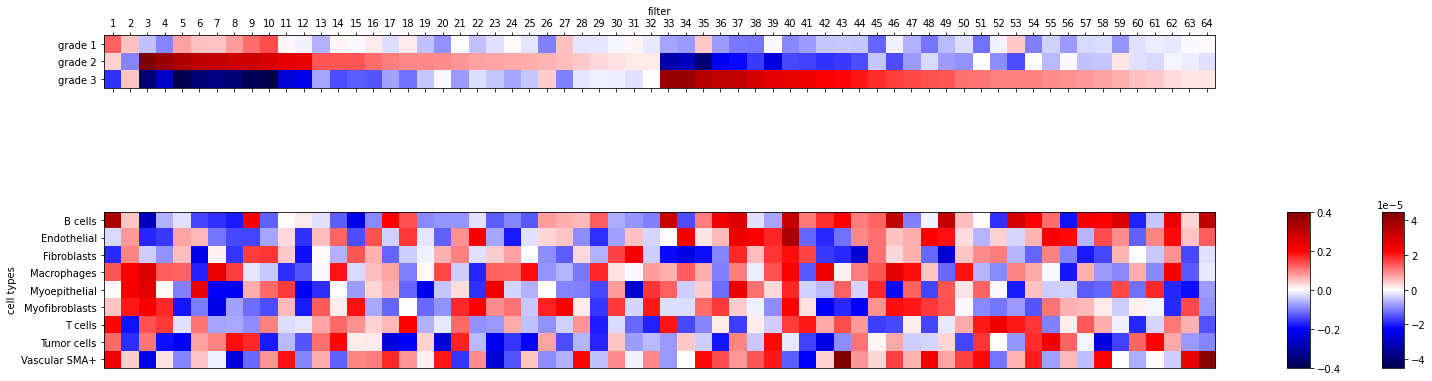

In [39]:
interpreter.plot_weight_matrix(
    layer_name='Layer_gcn_0', 
    target_label='grade',
    panel_width=20,
    panel_height=20,
#     save=dir_figures+"fig3c_std_filters_refactored_reversed", 
)


In [40]:
sns.set_palette('colorblind')

Confusion matrix on test set:


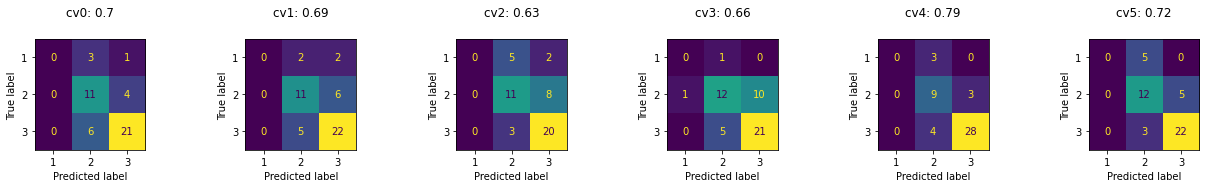

Confusion matrix on val set:


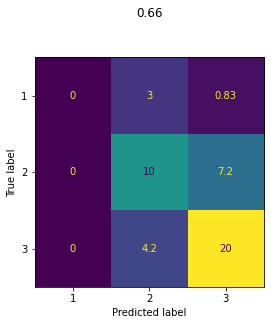

Confusion matrix on train set:


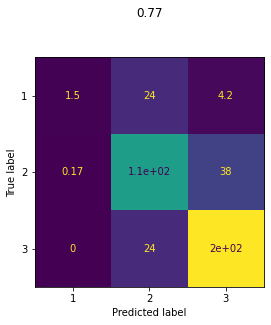

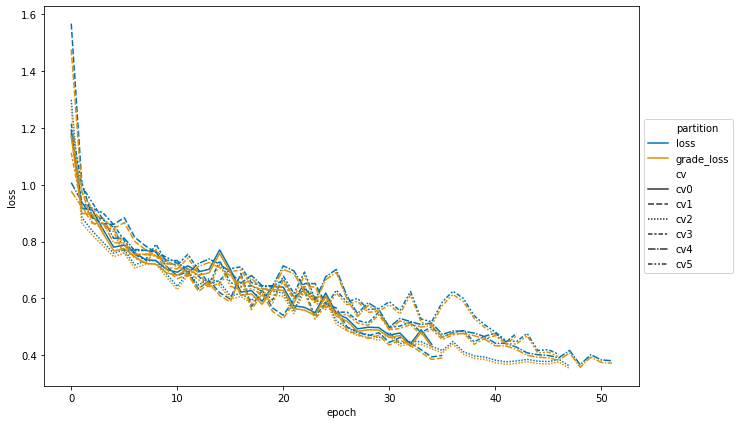


test
Grade 1 : 0.0
Grade 2 : 0.6561601681099595
Grade 3 : 0.8374750196127008
mean : 0.697740588834979

val
Grade 1 : 0.0
Grade 2 : 0.5944331826297771
Grade 3 : 0.831105345272012
mean : 0.6611939606319273

train
Grade 1 : 0.05622759856630825
Grade 2 : 0.7371683078132865
Grade 3 : 0.8921542264271259
mean : 0.7730061114301877


In [41]:
print('Confusion matrix on test set:')
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='test',
#     mean_across_cv=True,
#     save=dir_figures+"fig2c_std_conf_test_refactored", 
    x_ticks=['1', '2', '3'],
)

print('Confusion matrix on val set:')
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='val',
    mean_across_cv=True,
#     save=dir_figures+"fig2c_std_conf_val_refactored",
#     save=save,
    x_ticks=['1', '2', '3'],
)

print('Confusion matrix on train set:')
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='train',
    mean_across_cv=True,
#     save=dir_figures+"fig2c_std_conf_train_refactored",
#     save=save,
    x_ticks=['1', '2', '3']
)

container_gcnss.plot_training_history(
    plot_metrics=['loss', 'grade_loss'],
#     save=dir_figures+"supp6_std_history_refactored",
#     save=save,
)


for partition in ['test', 'val','train']:
    print()
    print(partition)
    mean = []
    for grade in [0, 1, 2]:
        acc = []
        for cv in ['cv0', 'cv1', 'cv2', 'cv3', 'cv4', 'cv5']:
            preds = np.argmax(container_gcnss.info[cv]['predictions'][partition]['grade'], axis=1)
            true = np.argmax(container_gcnss.true_labels[cv][partition]['grade'], axis=1)
            acc.append(np.mean(preds[true==grade] == true[true==grade]))
            if grade == 0:
                mean.append(np.mean(preds == true))
        mean_acc = np.mean(acc)
        print("Grade", grade+1, ":", mean_acc)
    mean = np.mean(mean)
    print("mean :", mean)

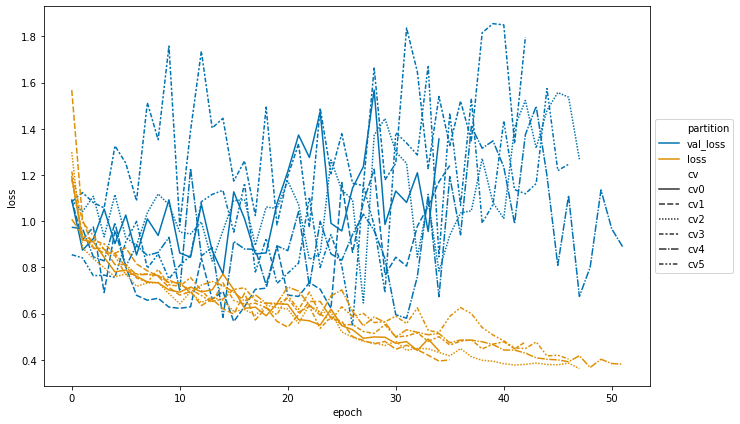

In [42]:
container_gcnss.plot_training_history(
    plot_metrics=['val_loss', 
                  'loss'],
#     save=dir_figures+"suppfig6_mt_on_train",
#     save=save,
)

In [43]:
# on train
gs_id, model_id, cv = container_gcnss.get_best_model_id(partition_select='train')
container_gcnss.get_info(gs_id = gs_id, model_id=model_id)

Confusion matrix on test set:


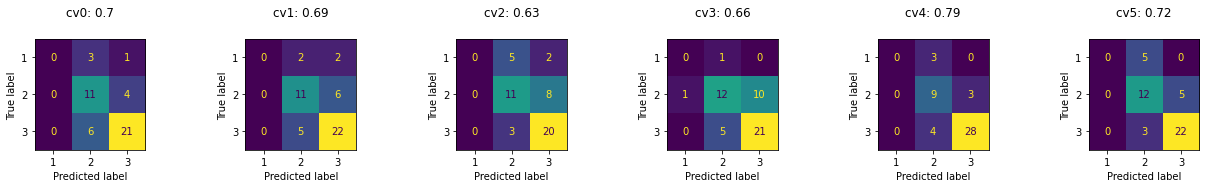

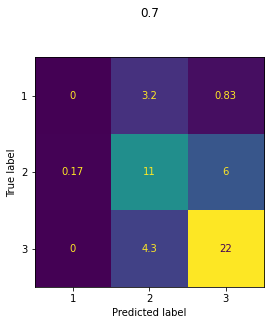

Confusion matrix on val set:


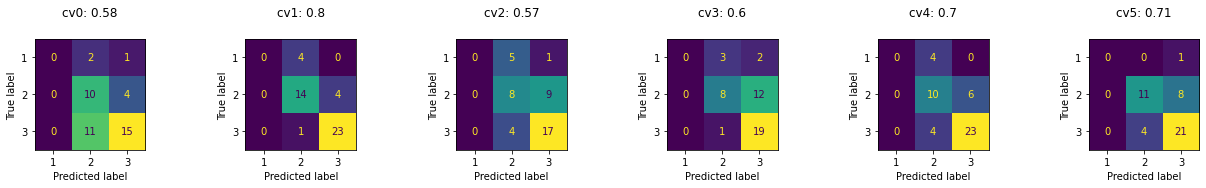

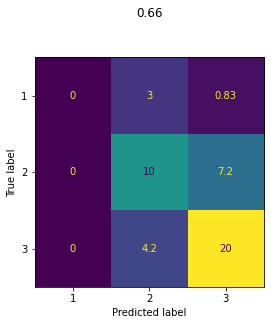

Confusion matrix on train set:


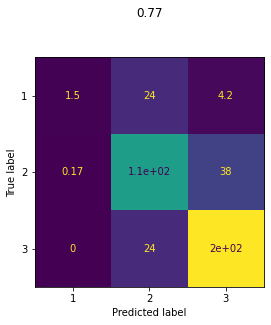

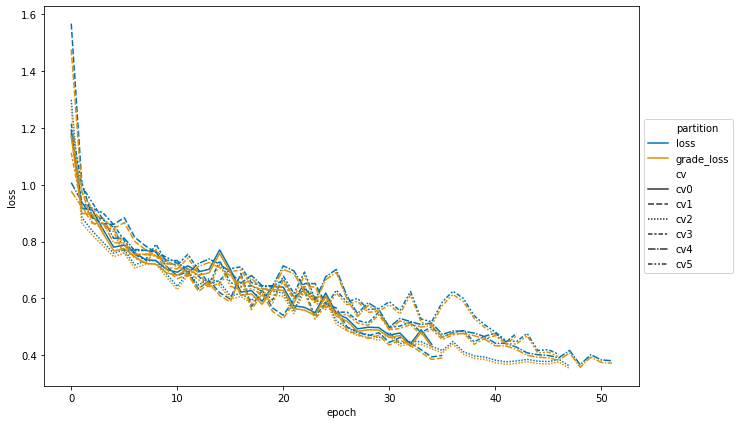


test
Grade 1 : 0.0
Grade 2 : 0.6561601681099595
Grade 3 : 0.8374750196127008
mean : 0.697740588834979

val
Grade 1 : 0.0
Grade 2 : 0.5944331826297771
Grade 3 : 0.831105345272012
mean : 0.6611939606319273

train
Grade 1 : 0.05622759856630825
Grade 2 : 0.7371683078132865
Grade 3 : 0.8921542264271259
mean : 0.7730061114301877


In [44]:
print('Confusion matrix on test set:')
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='test',
#     mean_across_cv=True,
#     save=dir_figures+"fig2c_std_conf_test_refactored", 
    x_ticks=['1', '2', '3'],
)

container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='test',
    mean_across_cv=True,
#     save=dir_figures+"fig2c_std_conf_test_refactored_on_train", 
    x_ticks=['1', '2', '3'],
)

print('Confusion matrix on val set:')
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='val',
#     mean_across_cv=True,
#     save=dir_figures+"fig2c_std_conf_val_refactored",
#     save=save,
    x_ticks=['1', '2', '3'],
)
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='val',
    mean_across_cv=True,
#     save=dir_figures+"fig2c_std_conf_val_refactored_on_train",
#     save=save,
    x_ticks=['1', '2', '3'],
)

print('Confusion matrix on train set:')
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='train',
    mean_across_cv=True,
#     save=dir_figures+"fig2c_std_conf_train_refactored_on_train",
#     save=save,
    x_ticks=['1', '2', '3']
)


# make the index unique in sns_data_loss ()
container_gcnss.plot_training_history(
    plot_metrics=['loss', 'grade_loss'],
#     save=dir_figures+"supp6_std_history_refactored_on_train",
#     save=save,
)


for partition in ['test', 'val','train']:
    print()
    print(partition)
    mean = []
    for grade in [0, 1, 2]:
        acc = []
        for cv in ['cv0', 'cv1', 'cv2', 'cv3', 'cv4', 'cv5']:
            preds = np.argmax(container_gcnss.info[cv]['predictions'][partition]['grade'], axis=1)
            true = np.argmax(container_gcnss.true_labels[cv][partition]['grade'], axis=1)
            acc.append(np.mean(preds[true==grade] == true[true==grade]))
            if grade == 0:
                mean.append(np.mean(preds == true))
        mean_acc = np.mean(acc)
        print("Grade", grade+1, ":", mean_acc)
    mean = np.mean(mean)
    print("mean :", mean)

In [45]:
# selected on validation
gs_id, model_id, cv = container_gcnss.get_best_model_id(partition_select='val') 
container_gcnss.get_info(gs_id = gs_id, model_id=model_id)

Confusion matrix on test set:


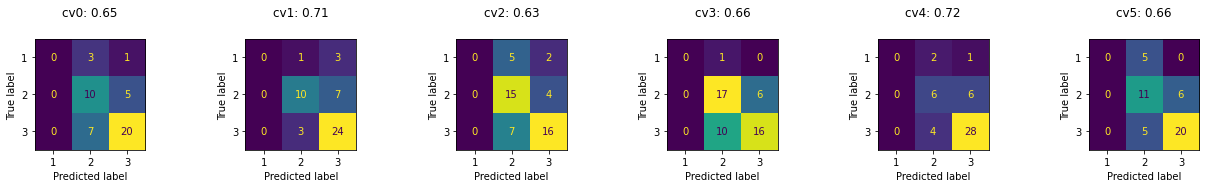

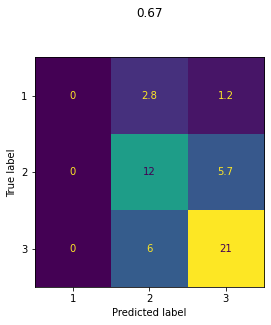

Confusion matrix on val set:


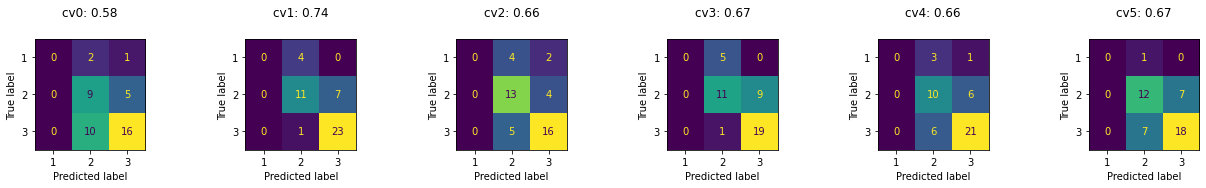

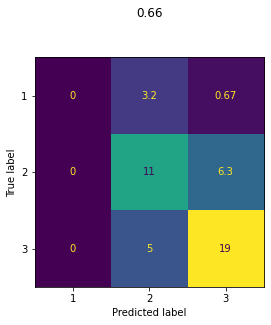

Confusion matrix on train set:


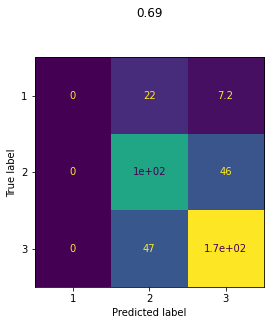

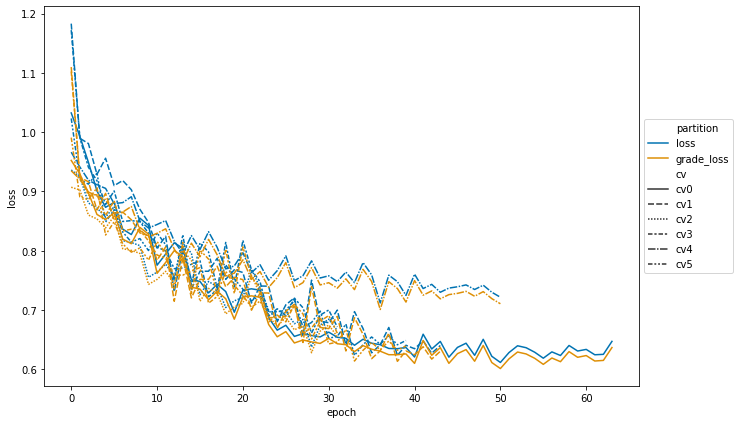


test
Grade 1 : 0.0
Grade 2 : 0.6550941505511434
Grade 3 : 0.7692777364878814
mean : 0.6726898385009261

val
Grade 1 : 0.0
Grade 2 : 0.6375421806149361
Grade 3 : 0.7972334147334147
mean : 0.6620874156881944

train
Grade 1 : 0.0
Grade 2 : 0.6905121856161514
Grade 3 : 0.787579572068586
mean : 0.6921069075218235


In [46]:
print('Confusion matrix on test set:')
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='test',
#     mean_across_cv=True,
#     save=dir_figures+"fig2c_std_conf_test_refactored", 
    x_ticks=['1', '2', '3'],
)

container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='test',
    mean_across_cv=True,
#     save=dir_figures+"fig2c_std_conf_test_refactored_on_val", 
    x_ticks=['1', '2', '3'],
)

print('Confusion matrix on val set:')
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='val',
#     mean_across_cv=True,
#     save=dir_figures+"fig2c_std_conf_val_refactored",
#     save=save,
    x_ticks=['1', '2', '3'],
)
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='val',
    mean_across_cv=True,
#     save=dir_figures+"fig2c_std_conf_val_refactored_on_val",
#     save=save,
    x_ticks=['1', '2', '3'],
)

print('Confusion matrix on train set:')
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='train',
    mean_across_cv=True,
#     save=dir_figures+"fig2c_std_conf_train_refactored_on_val",
#     save=save,
    x_ticks=['1', '2', '3']
)


# make the index unique in sns_data_loss ()
container_gcnss.plot_training_history(
    plot_metrics=['loss', 'grade_loss'],
#     save=dir_figures+"supp6_std_history_refactored_on_val",
#     save=save,
)


for partition in ['test', 'val','train']:
    print()
    print(partition)
    mean = []
    for grade in [0, 1, 2]:
        acc = []
        for cv in ['cv0', 'cv1', 'cv2', 'cv3', 'cv4', 'cv5']:
            preds = np.argmax(container_gcnss.info[cv]['predictions'][partition]['grade'], axis=1)
            true = np.argmax(container_gcnss.true_labels[cv][partition]['grade'], axis=1)
            acc.append(np.mean(preds[true==grade] == true[true==grade]))
            if grade == 0:
                mean.append(np.mean(preds == true))
        mean_acc = np.mean(acc)
        print("Grade", grade+1, ":", mean_acc)
    mean = np.mean(mean)
    print("mean :", mean)